# Convolutional NN

In [13]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from si.data import Dataset, summary
from si.util import to_categorical

Load the MNIST dataset

In [14]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [15]:
train,test = load_mnist(500)

In [16]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.y = to_categorical(train.y)

In [17]:
preprocess(train)
preprocess(test)

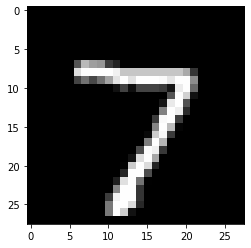

In [18]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [19]:
from si.supervised import NN, Dense, Activation, Conv2D, Flatten
from si.util import Tanh, Sigmoid

Build the model

In [20]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [21]:
net.fit(train)

 9/2000, error= 0.25962069101083646epoch 11/2000, error= 0.24899886687412387epoch 13/2000, error= 0.23855648022292067epoch 15/2000, error= 0.2280356841332198epoch 17/2000, error= 0.21724500754864476epoch 19/2000, error= 0.20606714395712697epoch 21/2000, error= 0.19449011391160406epoch 23/2000, error= 0.182648847959935epoch 25/2000, error= 0.17085298571776197epoch 27/2000, error= 0.15956012598843453epoch 29/2000, error= 0.14927658649952927epoch 31/2000, error= 0.1403588611473031epoch 33/2000, error= 0.13287258776869662epoch 35/2000, error= 0.1266698922034135epoch 37/2000, error= 0.12153153720894525epoch 39/2000, error= 0.11724803215113844epoch 41/2000, error= 0.11364597933218101epoch 43/2000, error= 0.11058949130557305epoch 45/2000, error= 0.10797402094356251epoch 47/2000, error= 0.1057193117253998epoch 49/2000, error= 0.10376339141265144epoch 51/2000, error= 0.10205788526257047epoch 53/2000, error= 0.1005644372262909epoch 55/2000, error= 0.099252011651549epoch 57/2000, error= 0.0980949

In [22]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.y[0:3])

AssertionError: Model must be fitted before prediction

In [ ]:
conv = net.layers[0]

In [ ]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))
